# Flight

## Step 1| Important Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats 

%matplotlib inline


In [2]:
#set resolution of the plotted figures
plt.rcParams['figure.dpi']= 120 

#Configure seaborn plot style : set backgrooung color and use dark grid 

sns.set (rc = { 'axes.facecolor':'#F3E8FF'}, style='darkgrid')

## Step 2| Read Dataset

In [3]:
df = pd.read_csv("flights.csv")
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


## Step 3| Dataset Overview

### Step 3.1 | Dataset basic information 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

### Step 3.2 | Summary statistics for numerical variable 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,336776.0,168387.500000,97219.001466,0.0,84193.75,168387.5,252581.25,336775.0
year,336776.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
month,336776.0,6.548510,3.414457,1.0,4.00,7.0,10.00,12.0
day,336776.0,15.710787,8.768607,1.0,8.00,16.0,23.00,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.00,1401.0,1744.00,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.00,1359.0,1729.00,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.00,-2.0,11.00,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.00,1535.0,1940.00,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.00,1556.0,1945.00,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.00,-5.0,14.00,1272.0


###  Step 3.3 | Summary statistics for categorical vatiables

In [6]:
df.describe(include='object')

,carrier,tailnum,origin,dest,time_hour,name
count,336776,334264,336776,336776,336776,336776
unique,16,4043,3,105,6936,16
top,UA,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,58665,575,120835,17283,94,58665


## Step 4| EDA

### Stap 4.1 | Univarate Analysis

In [23]:
color = "#548285"


def plot_hist (column , bins , title , xlabel , fontsize=8 , rotation=0):
  plt.figure(figsize=(15,5))
  counts,bins,patches = plt.hist(column,bins=bins , color = color , edgecolor = 'white')
  plt.title(title , fontsize=15)
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel('Frequency', fontsize=12)

  bins_center = 0.5*(bins[:-1]+bins[1:])
  for count, x in zip(counts , bins_center):
    if count>0 :
      plt.text(x,count,str(int(count)),fontsize=fontsize,ha='center' , va='bottom')

  plt.show()


def plt_bar(column , title, xlabel , fontsize=8 , rotation=0 ):
  plt.figure(figsize=(15,5))
  counts=column.value_counts()
  counts.plot(kind='bar', color= color , edgecolor='white')
  plt.title(title , fontsize=15)
  plt.xlabel(xlabel , fontsize=12)
  plt.ylabel('Frequency', fontsize=12)

  for i , v in enumerate(counts):
    plt.text(i,v,str(v),fontsize=fontsize, ha='center', va='bottom')

  plt.show()



#### Step 4.1.1 | year

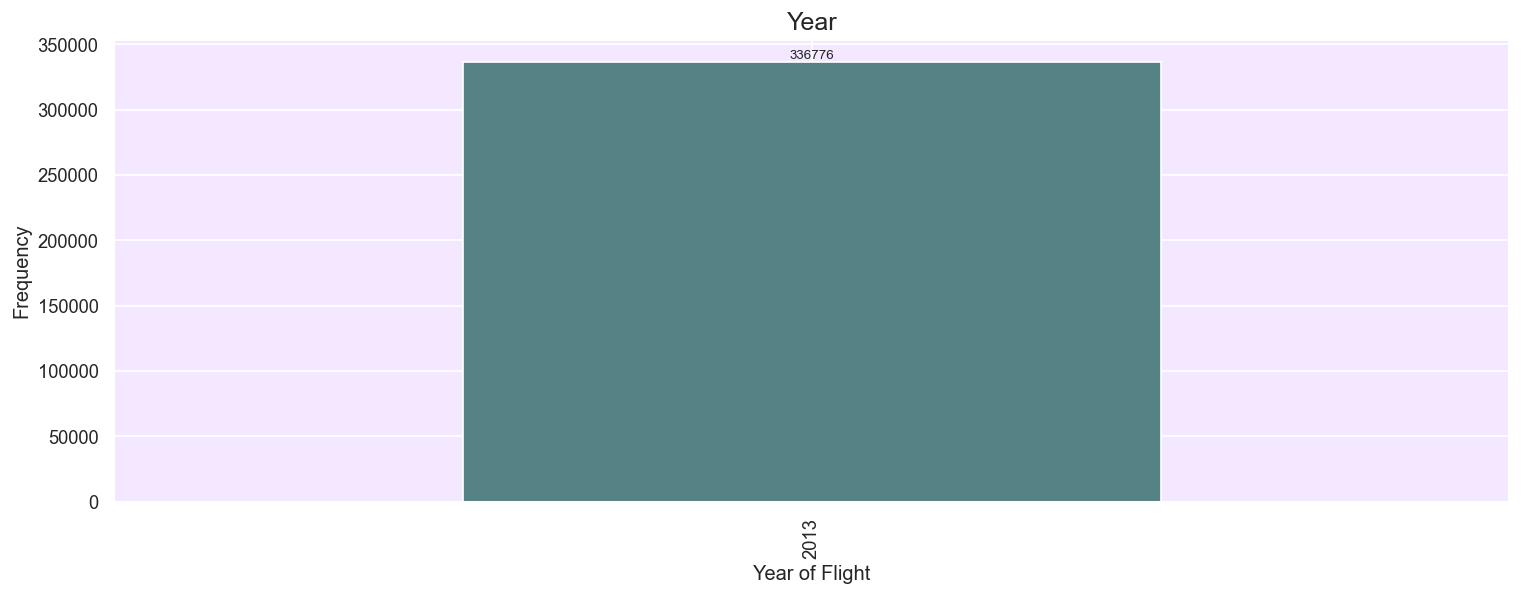

In [14]:
plt_bar(df['year'],'Year' , 'Year of Flight')

داده‌های این مجموعه فقط مربوط به سال (۲۰۱۳) هستند، بنابراین نمودار ستونی تنها یک ستون را نشان می‌دهد

#### Step 4.1.2 | month

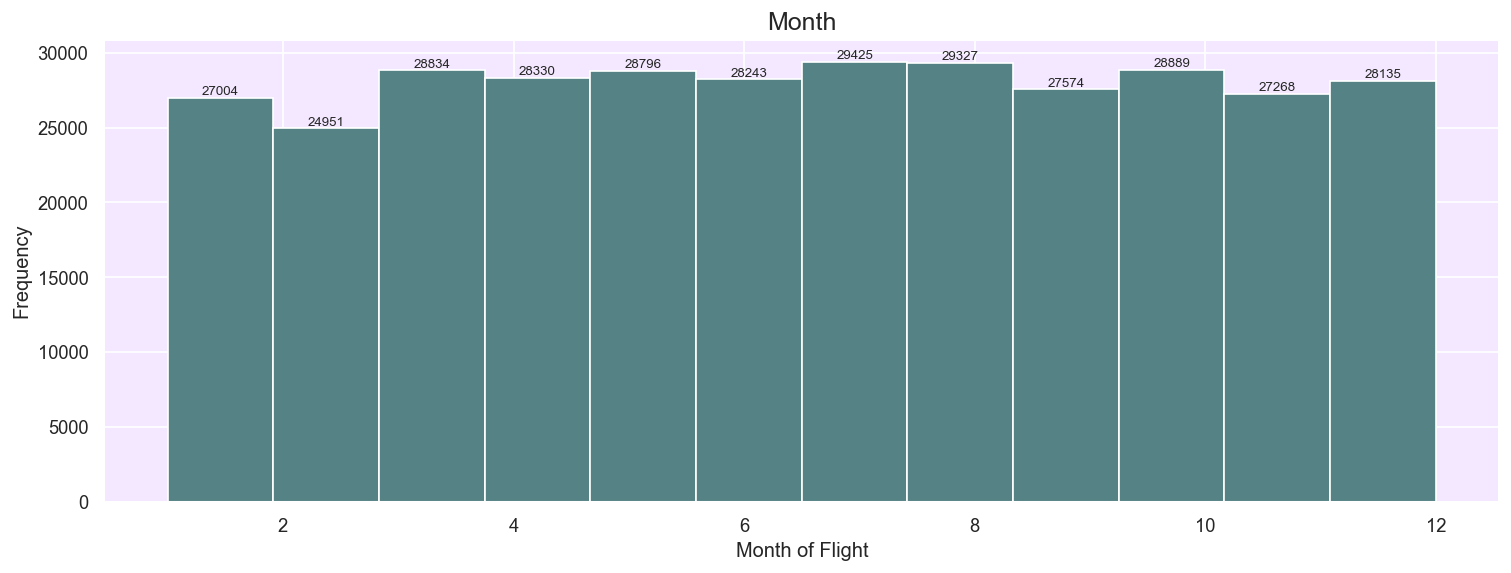

In [24]:
plot_hist(df['month'],bins=12, title='Month', xlabel='Month of Flight')

هیستوگرام نشان می‌دهد که توزیع پروازها در ماه‌های مختلف تقریباً یکنواخت است، با این تفاوت که در ماه فوریه اندکی کاهش مشاهده می‌شود که احتمالاً به دلیل کمتر بودن تعداد روزهای این ماه است

#### Step 4.1.3 | day

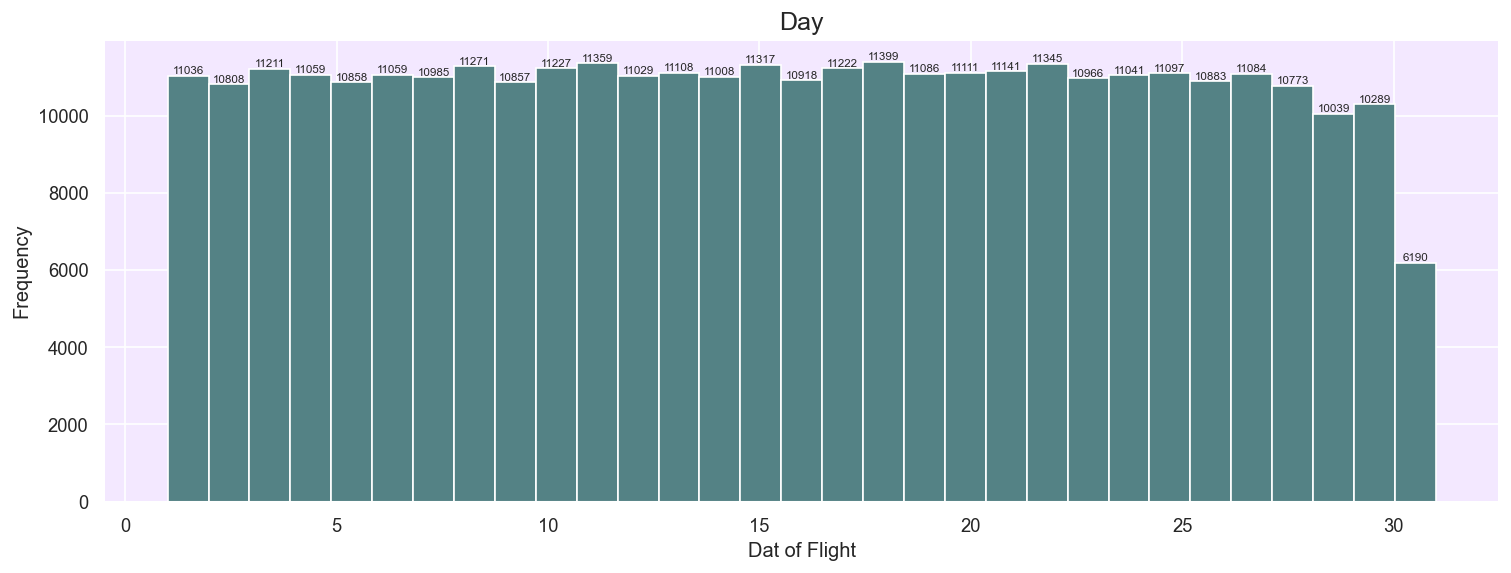

In [26]:
plot_hist(df['day'],bins=31,title='Day', xlabel='Dat of Flight', fontsize=7)

هیستوگرام نشان می‌دهد که توزیع پروازها در روزهای ماه تقریباً یکنواخت است، با این تفاوت که در روزهای پایانی ماه اندکی کاهش دیده می‌شود. این کاهش به این دلیل است که برخی ماه‌ها کمتر از ۳۱ روز دارند

#### Step 4.1.4 | Dep-Time

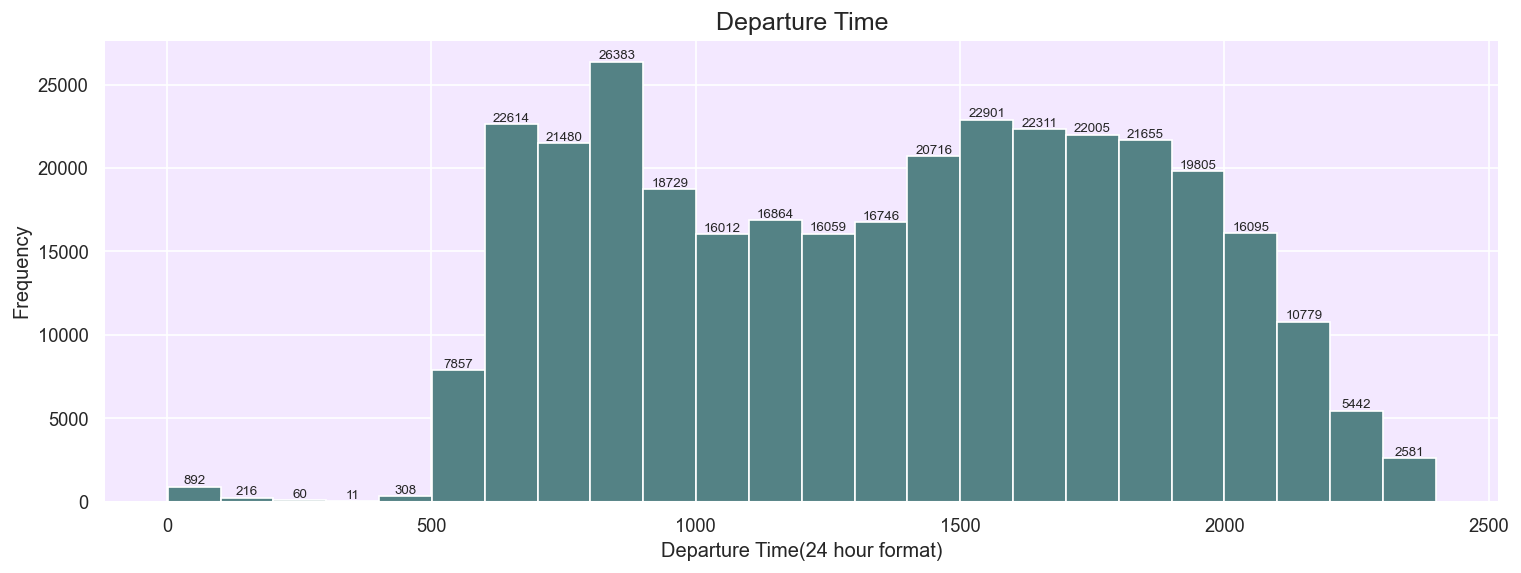

In [27]:
plot_hist(df['dep_time'].dropna(),bins=24, title='Departure Time',xlabel='Departure Time(24 hour format)')

هیستوگرام یک توزیع دو نمایی را نشان می‌دهد که بیانگر وجود دو دوره اوج برای پروازها است. اوج اول در صبح حدود ساعت ۰۶:۰۰ رخ می‌دهد و اوج دوم در عصر حدود ساعت ۱۸:۰۰. همچنین در ساعات شب، بین ۲۳:۰۰ تا ۰۴:۰۰ تعداد پروازها کمتر است

#### Step 4.1.5 | sched-dep-time 

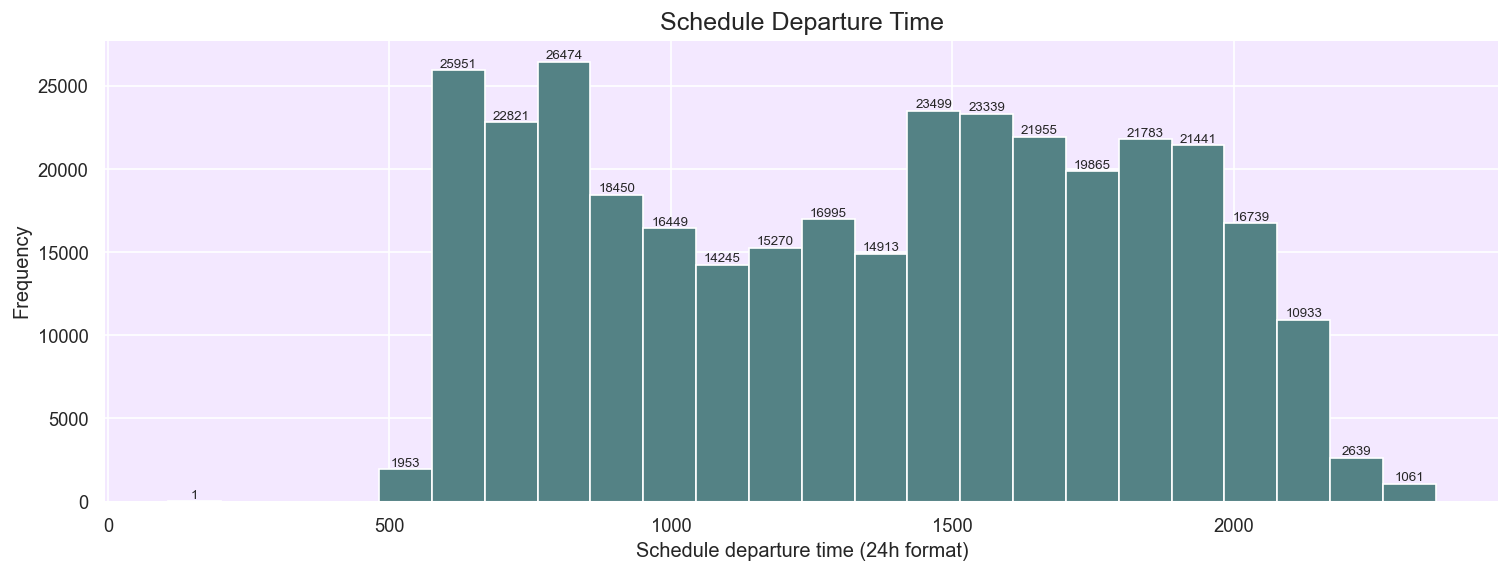

In [28]:
plot_hist(df['sched_dep_time'],bins=24,title='Schedule Departure Time' , xlabel= 'Schedule departure time (24h format)')

این هیستوگرام مشابه هیستوگرام زمان پروازهای خروجی است. همچنین دو دوره اوج برای پروازهای برنامه‌ریزی‌شده را نشان می‌دهد که با زمان‌های واقعی پروازها یکسان هستند